# Problem 1 [Waiting]
> Use the inverse CDF method to generate independent samples, $X_i$, of the exponential random variable with average waiting time of 0.2 time units. Evaluate the quality of your generator with goodness of fit tests.

The exponential distribution with $\lambda= \frac{1}{0.2}=5$ has the cdf:
$$
F_X(x)=
\begin{cases}
1-e^{-5 x}, & x\geqslant 0\\
0, & x < 0
\end{cases}
$$

<IPython.core.display.Javascript object>


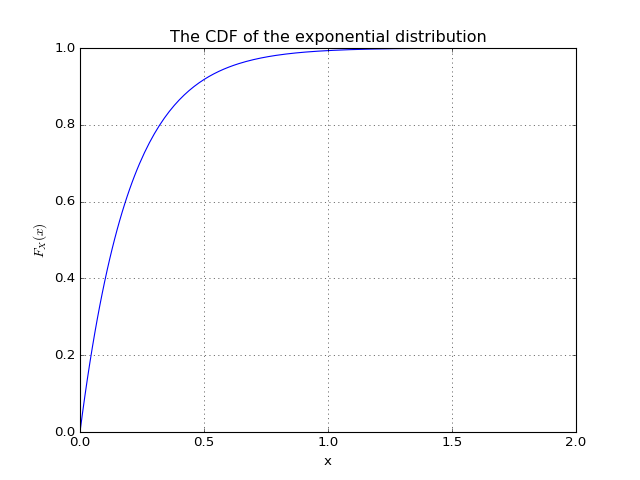

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,2,0.01)
y = 1-np.exp(-5*x)
plt.figure()
plt.plot(x,y)
plt.title('The CDF of the exponential distribution')
plt.xlabel('x')
plt.ylabel('$F_X(x)$')
plt.grid()
plt.show()

The inverse of it will be,
$$
F^{-1}(y)=-0.2log(1-y) , \ 0 \leqslant y \leqslant 1
$$

<IPython.core.display.Javascript object>


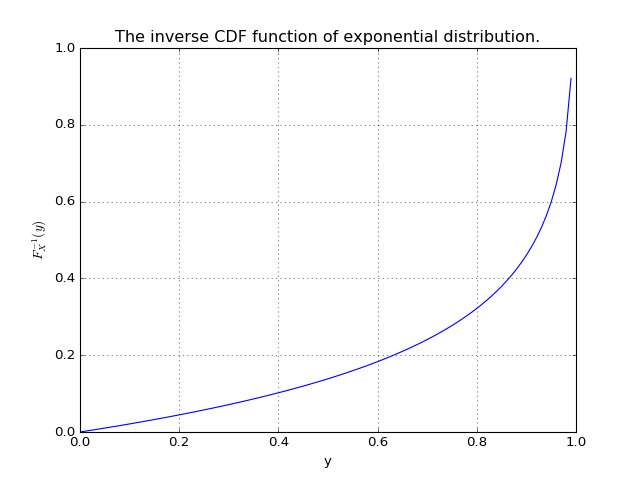

In [2]:
x = np.arange(0,1,0.01)
y = -0.2*np.log(1-x)
plt.figure()
plt.plot(x,y)
plt.grid()
plt.title('The inverse CDF function of exponential distribution.')
plt.xlabel('y')
plt.ylabel('$F_X^{-1}(y)$')
plt.show()

The inverse CDF method has the following procedures,
1. Generate the random variable $Y \sim U(0,1)$
2. Use the inverse CDF function $F_X^{-1}(y)$ to get the output value.

<IPython.core.display.Javascript object>


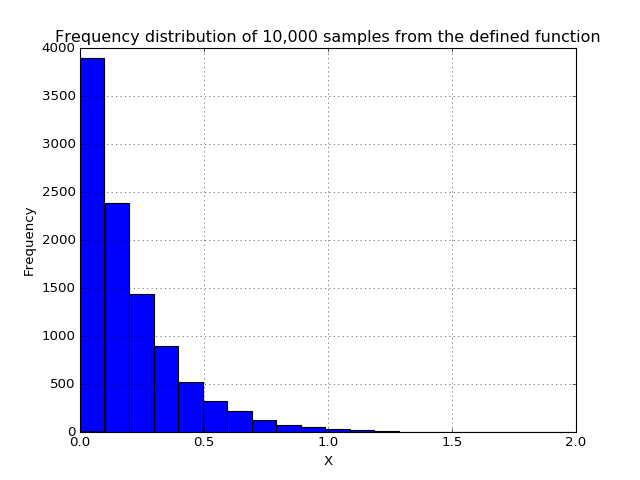

In [3]:
def my_exp_rv(row = 1,column = 1):
    y = np.random.rand(row, column)
    X = -0.2*np.log(1-y)
    return X
# This random.seed value dramatically affects the chi-square result!!!
# np.random.seed(111)
x = my_exp_rv(10000,1)
plt.figure()
plt.hist(x, bins = 20)
plt.title('Frequency distribution of 10,000 samples from the defined function')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid()
plt.show()

We define the funtion 'my_exp_rv' to generate the RV that we want. Next, we use the chi-square to test the goodness of fit. We set the 11 intervals as the following:
$$
[0,0.1],[0.1,0.2],[0.2,0.3]...[0.8,0.9],[0.9,1.0],[1.0,+\infty]
$$

In [4]:
from scipy.stats import chisquare
x_e_1 = np.arange(0,1,0.1)
x_e_2 = np.arange(0.1,1.1,0.1)
p1 = 1-np.exp(-5*x_e_1)
p2 = 1-np.exp(-5*x_e_2)
p_int = p2 - p1
p_int = np.append(p_int, [1-p2[-1]])
n, bins = np.histogram(x, bins = np.append(np.arange(0,1.1,0.1),[float('inf')]))
ne = p_int * 10000
print(chisquare(n, f_exp=ne))


Power_divergenceResult(statistic=4.4188697446176564, pvalue=0.92647936169478595)


As we can see in the above result, the pvalue is up to 0.98 which means a very good fit to the exponential distribution.